In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
file_path = 'sustainable_fashion_trends_2024.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [ ]:
df.drop('Brand_ID',axis=1,inplace=True)
df.drop('Brand_Name',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     5000 non-null   object 
 1   Year                        5000 non-null   int64  
 2   Sustainability_Rating       5000 non-null   object 
 3   Material_Type               5000 non-null   object 
 4   Eco_Friendly_Manufacturing  5000 non-null   object 
 5   Carbon_Footprint_MT         5000 non-null   float64
 6   Water_Usage_Liters          5000 non-null   float64
 7   Waste_Production_KG         5000 non-null   float64
 8   Recycling_Programs          5000 non-null   object 
 9   Product_Lines               5000 non-null   int64  
 10  Average_Price_USD           5000 non-null   float64
 11  Market_Trend                5000 non-null   object 
 12  Certifications              5000 non-null   object 
dtypes: float64(4), int64(2), object(7

In [ ]:
df.isnull().sum()

,0
Brand_ID,0
Brand_Name,0
Country,0
Year,0
Sustainability_Rating,0
Material_Type,0
Eco_Friendly_Manufacturing,0
Carbon_Footprint_MT,0
Water_Usage_Liters,0
Waste_Production_KG,0


In [ ]:
df['Certifications'] = df['Certifications'].fillna('Unknown/Not Verified')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5000.0,2.016956e+03,4.347466e+00,2010.00,2.013000e+03,2017.000,2021.000,2024.00
Carbon_Footprint_MT,5000.0,2.503176e+02,1.428023e+02,1.04,1.266150e+02,250.650,372.255,499.93
Water_Usage_Liters,5000.0,2.517862e+06,1.429043e+06,50106.18,1.293087e+06,2499095.995,3763859.550,4999596.61
Waste_Production_KG,5000.0,5.010730e+04,2.874638e+04,1026.38,2.534080e+04,50466.340,74984.650,99947.85
Product_Lines,5000.0,1.043120e+01,5.706573e+00,1.00,5.000000e+00,10.000,15.000,20.00
Average_Price_USD,5000.0,2.593542e+02,1.377310e+02,20.02,1.428650e+02,258.615,378.595,499.94


In [ ]:
df_missing = df.isnull().sum()
df_info, df_head, df_missing

(None,
      Brand_ID Brand_Name    Country  Year Sustainability_Rating  \
 0  BRAND-0001    Brand_1  Australia  2018                     D   
 1  BRAND-0002    Brand_2      Japan  2015                     D   
 2  BRAND-0003    Brand_3        USA  2024                     A   
 3  BRAND-0004    Brand_4      Italy  2023                     D   
 4  BRAND-0005    Brand_5        USA  2016                     D   
 
    Material_Type Eco_Friendly_Manufacturing  Carbon_Footprint_MT  \
 0         Tencel                         No                 1.75   
 1  Vegan Leather                        Yes               124.39   
 2  Vegan Leather                         No               336.66   
 3  Bamboo Fabric                         No               152.04   
 4  Bamboo Fabric                        Yes               415.63   
 
    Water_Usage_Liters  Waste_Production_KG Recycling_Programs  Product_Lines  \
 0          4511152.79             97844.11                 No              2   
 1   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

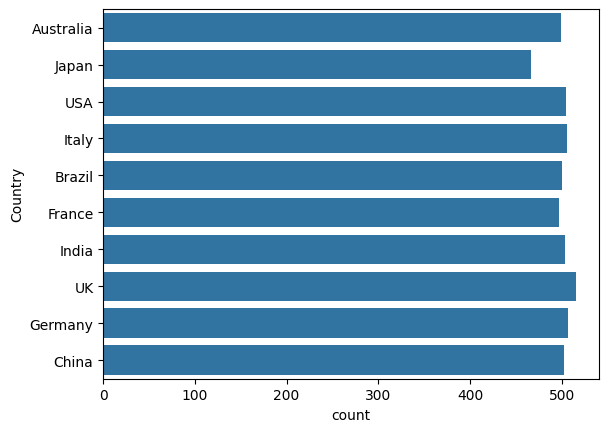

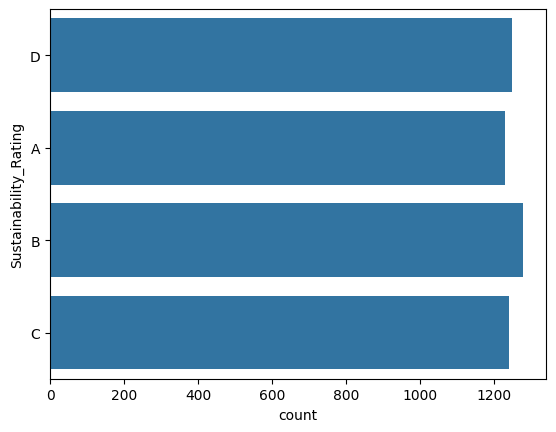

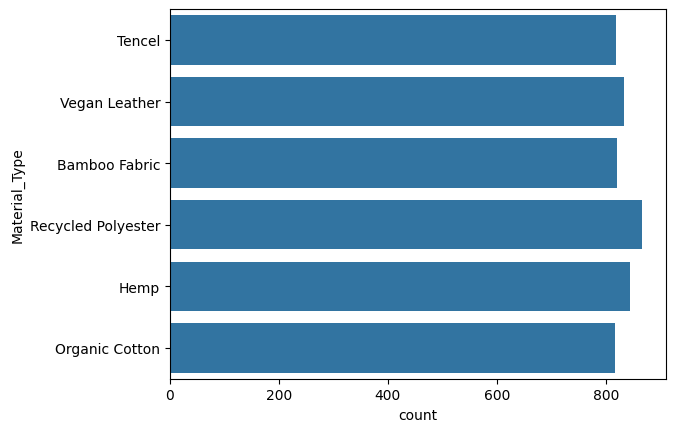

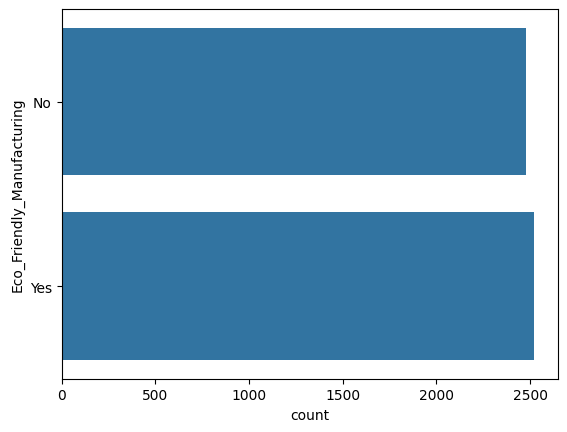

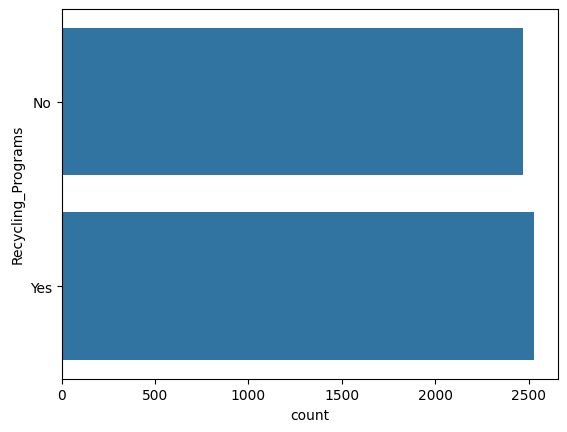

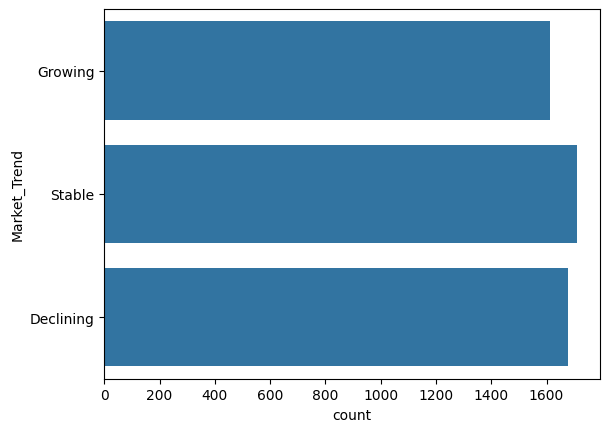

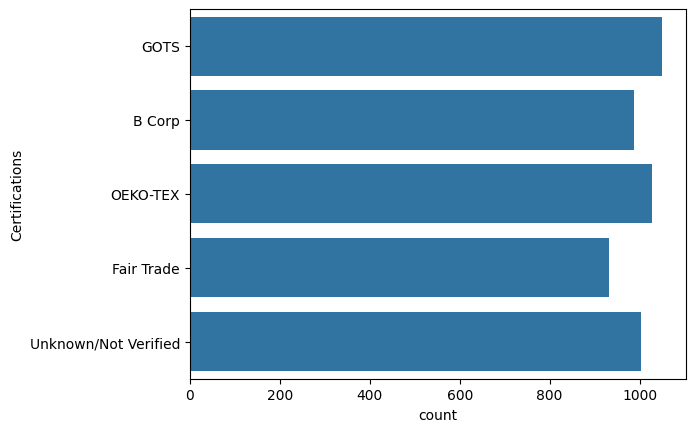

In [ ]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(y=col,data=df)
        plt.show()

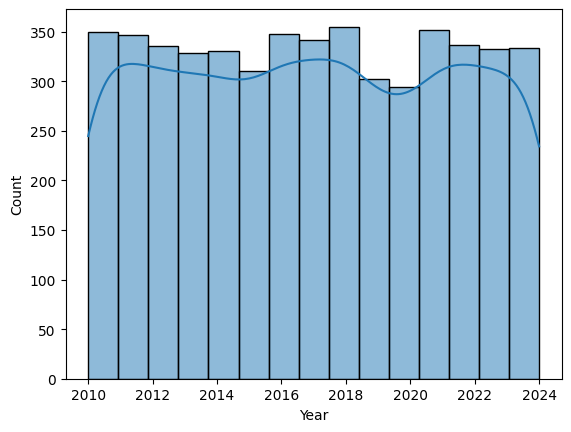

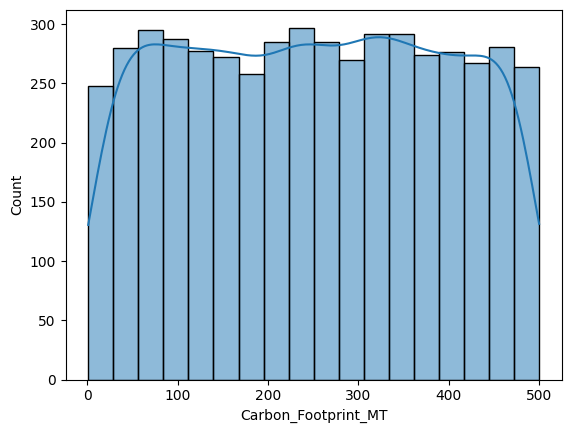

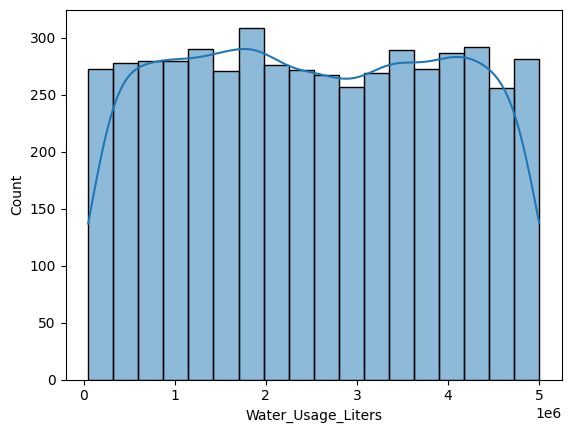

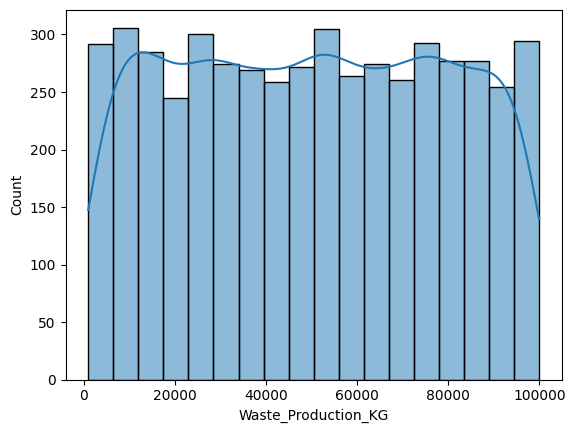

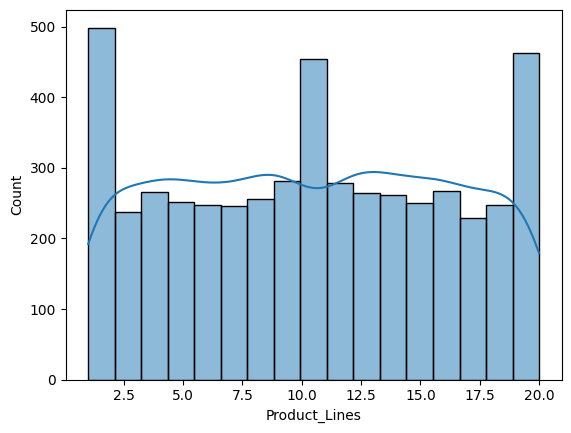

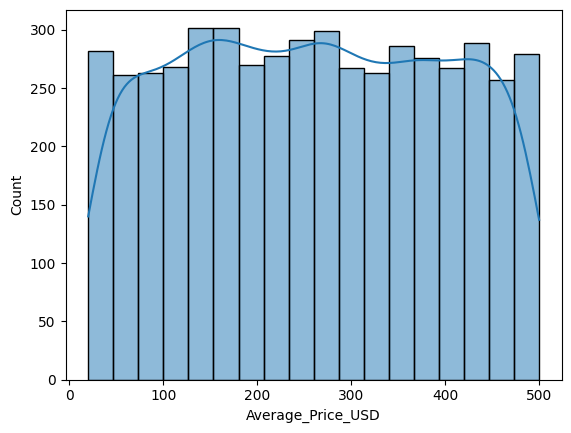

In [ ]:
for col in df:
    if df[col].dtype != 'O':
        sns.histplot(df[col],kde=True)
        plt.show()

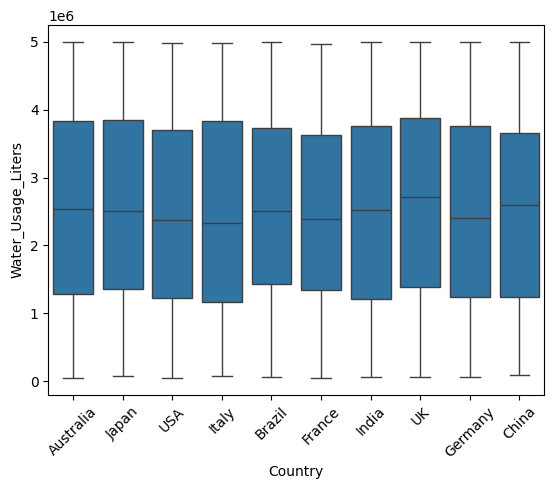

In [ ]:
sns.boxplot(x='Country',y='Water_Usage_Liters',data=df)
plt.xticks(rotation=45)
plt.show()

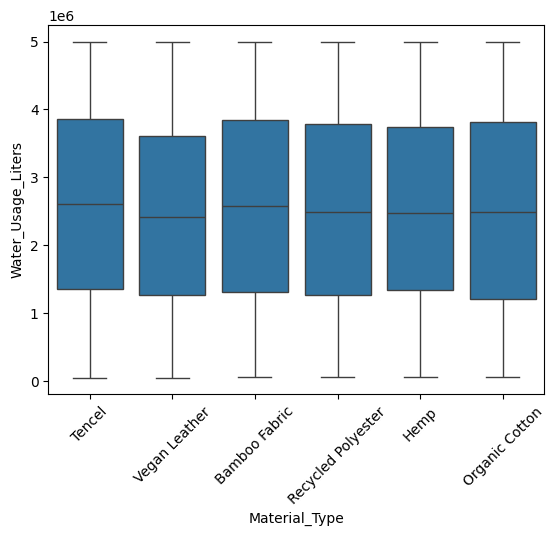

In [ ]:
sns.boxplot(x='Material_Type',y='Water_Usage_Liters',data=df)
plt.xticks(rotation=45)
plt.show()

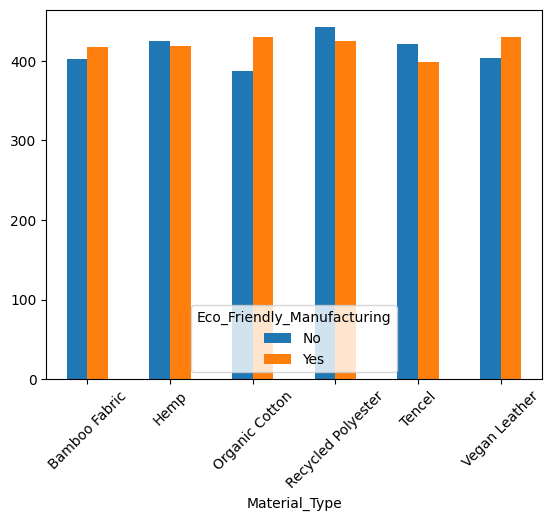

In [ ]:
mat_eco = pd.crosstab(df['Material_Type'],df['Eco_Friendly_Manufacturing'])
mat_eco.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

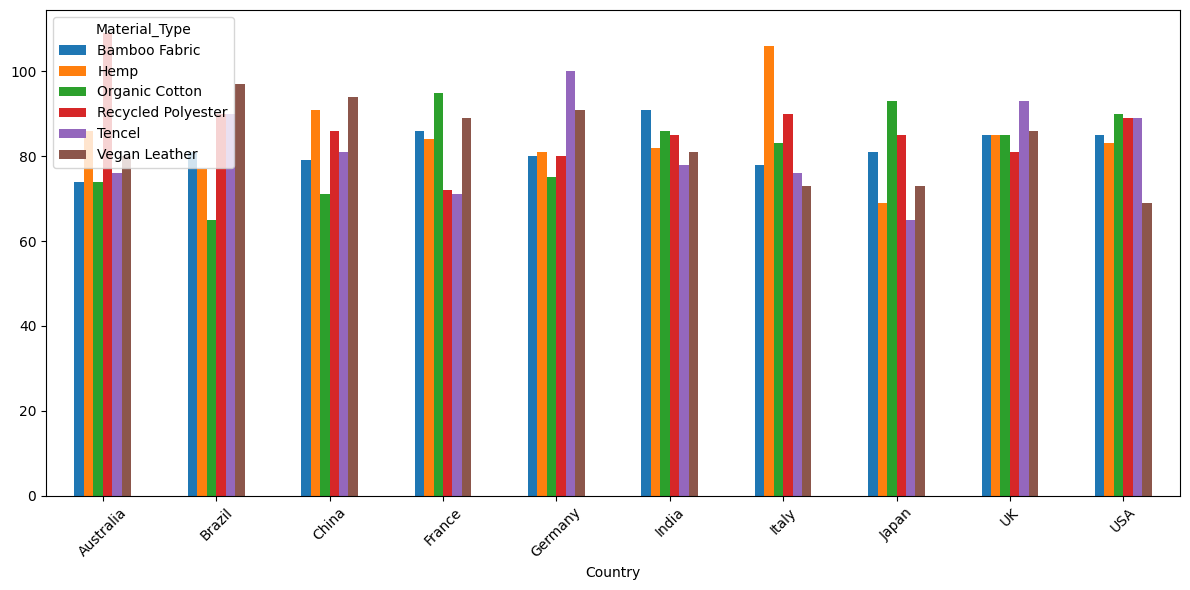

In [ ]:
cout_mat = pd.crosstab(df['Country'], df['Material_Type'])
fig, ax = plt.subplots(figsize=(12, 6))
cout_mat.plot(kind='bar', ax=ax)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

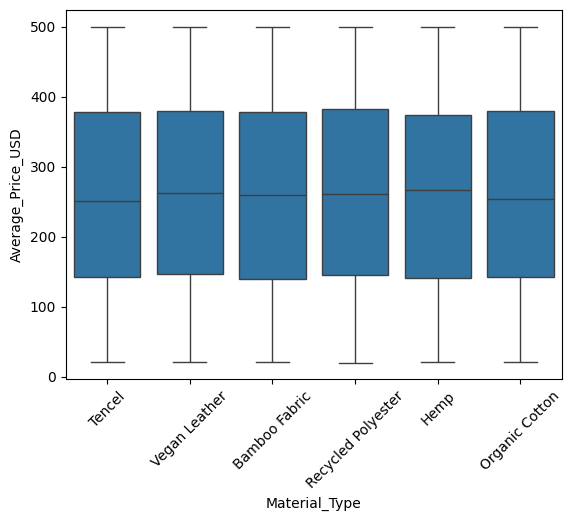

In [ ]:
sns.boxplot(x='Material_Type',y='Average_Price_USD',data=df)
plt.xticks(rotation=45)
plt.show()

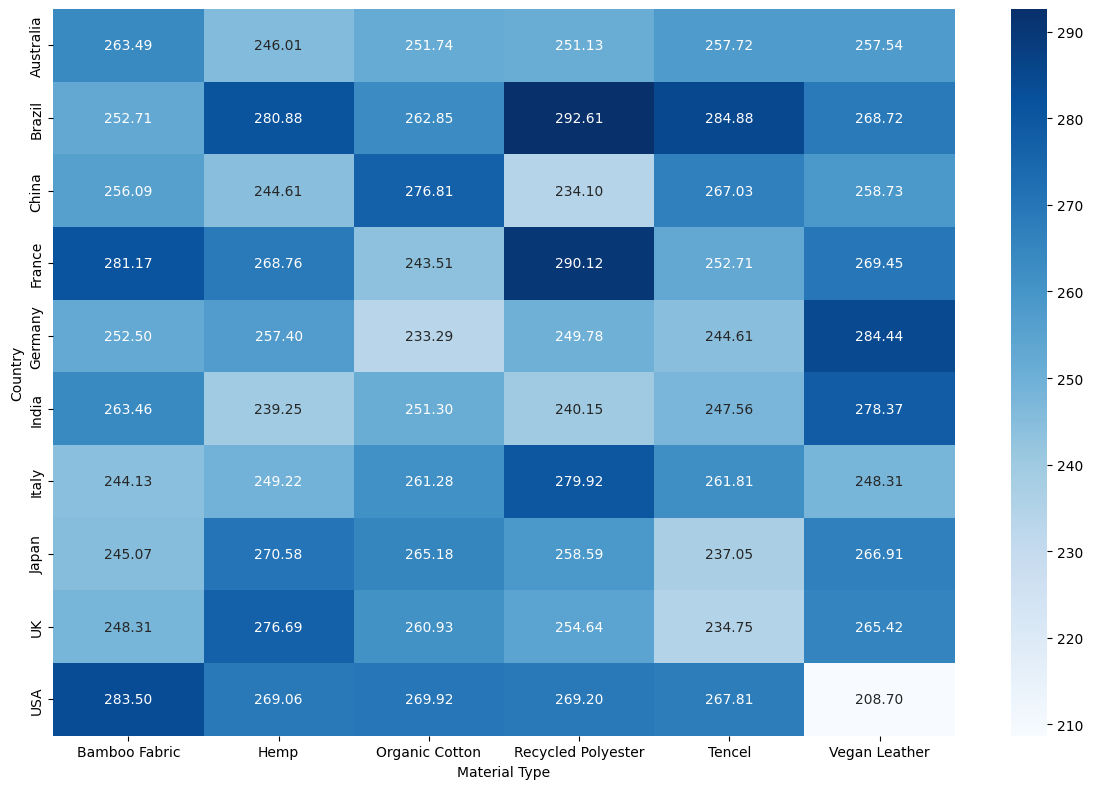

In [ ]:
average_price = df.groupby(['Country', 'Material_Type'])['Average_Price_USD'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(average_price, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Material Type')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

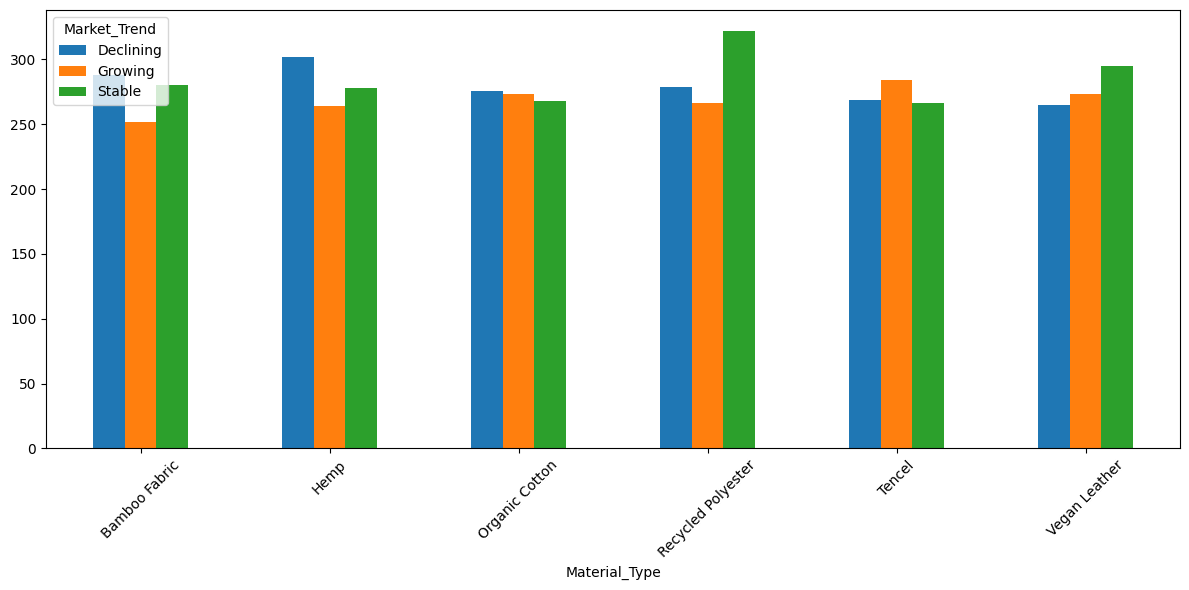

In [ ]:
market = pd.crosstab(df['Material_Type'], df['Market_Trend'])
fig, ax = plt.subplots(figsize=(12, 6))
market.plot(kind='bar', ax=ax)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['Sustainability_Rating'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [ ]:
rating_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
df['Sustainability_Rating_Num'] = df['Sustainability_Rating'].map(rating_mapping)

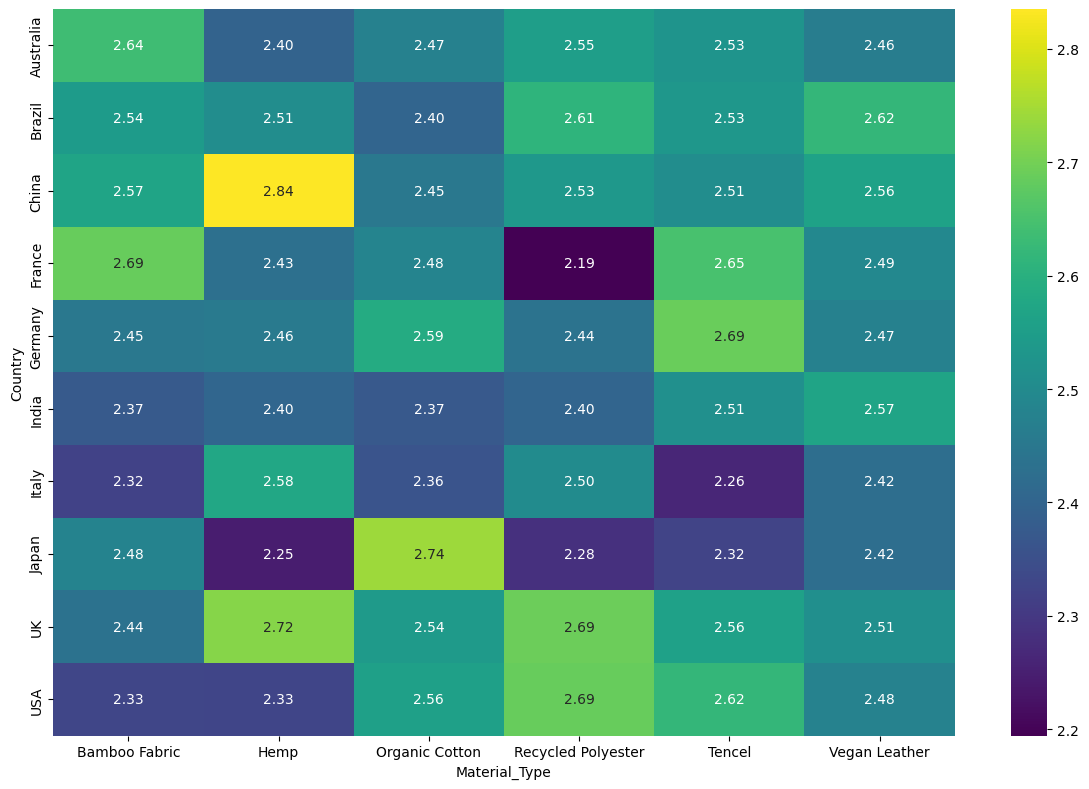

In [ ]:
sustainability_avg = df.groupby(['Country', 'Material_Type'])['Sustainability_Rating_Num'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(sustainability_avg, annot=True, cmap='viridis', fmt='.2f')
plt.tight_layout()
plt.show()